# includes

In [1]:
import mplfinance as mpf
import pandas as pd

from data_proc import DataProc
from capture_plot import CaptureOnClick

from datetime import datetime, timedelta
import os

%matplotlib widget
#%matplotlib inline
#%matplotlib notebook


In [2]:
print(mpf.__version__)

0.12.10b0


# simple flow

## Configure data input

### Presets
````
SYMBOLS = ['BTCUSDT', 'ETHUSDT']
INTERVALS = ['1m', '3m', '5m', '15m', '30m', '1h', '2h', '4h', '6h', '8h', '12h', '1d', '3d', '1w', '1M']
TOTAL_CANDLES = 100
SYMBOL = 'BTCUSDT'
DEF_INTERVAL = '1m'
DATA_REFRESH_RAT = 3


In [3]:
#initialize data processor
TOTAL_CANDLES = 100
dp = DataProc('.\\.data\\ntb\\v0.05a\\')

print(dp)

In [4]:

#datamap initialized with two entries: BTCUSDT and ETHUSDT, each may hold candles data in corresponding interval from INTERVALS 
datamap = pd.DataFrame(dp.data_map)

#data is accumulated here, (TODO:and updated when needed )
datastore = pd.DataFrame(dp.pair_df_store)

#get one TOTAL_CANDLES set of OCHL+Volume for 
pair_df = pd.DataFrame(datastore['BTCUSDT']['1m'])

#default load:
last_updated = datamap['BTCUSDT']['1m']['Updated']
start_date = datamap['BTCUSDT']['1m']['StartDate']
end_date = datamap['BTCUSDT']['1m']['EndDate']

total_candles = pd

print (f'\nwe have: {TOTAL_CANDLES} candles of {dp.pair} at {dp.interval} loaded on {last_updated} between dates: {start_date}-{end_date} \n')
print(datamap.shape, datastore.shape, pair_df.shape, '\n')
print(pair_df.index[0:5], '\n')
print(pair_df[0:5], '\n')


we have: 100 candles of BTCUSDT at 1m loaded on 2023-12-17 02:57:47.712355 between dates: 2023-12-16 23:18:00-2023-12-17 00:57:00 

(15, 2) (15, 2) (100, 5) 

DatetimeIndex(['2023-12-16 23:18:00', '2023-12-16 23:19:00',
               '2023-12-16 23:20:00', '2023-12-16 23:21:00',
               '2023-12-16 23:22:00'],
              dtype='datetime64[ns]', name='Date', freq=None) 

                         Open      High       Low     Close    Volume
Date                                                                 
2023-12-16 23:18:00  42213.21  42213.21  42206.08  42209.11  12.28905
2023-12-16 23:19:00  42209.11  42238.43  42209.10  42238.42  13.48737
2023-12-16 23:20:00  42238.43  42238.43  42194.19  42194.20  15.52837
2023-12-16 23:21:00  42194.20  42216.27  42188.01  42215.53  15.81228
2023-12-16 23:22:00  42215.53  42224.00  42215.52  42223.99   2.67189 



WHT?

In [5]:
pair_df,_ = dp.get_new_data('BTCUSDT', '1h')

print(pair_df)

                         Open      High       Low     Close      Volume
Date                                                                   
2023-12-12 21:00:00  41229.61  41381.10  41042.08  41104.02  1216.50564
2023-12-12 22:00:00  41104.02  41285.00  41079.48  41230.20  1129.69018
2023-12-12 23:00:00  41230.21  41555.00  41230.20  41492.39  1645.11584
2023-12-13 00:00:00  41492.38  41506.00  41300.00  41411.40  1229.04020
2023-12-13 01:00:00  41411.41  41436.00  40880.81  41022.00  2266.34194
...                       ...       ...       ...       ...         ...
2023-12-16 20:00:00  42351.74  42412.37  42245.00  42333.88   962.80584
2023-12-16 21:00:00  42333.89  42373.70  42241.10  42295.04   677.00945
2023-12-16 22:00:00  42295.05  42320.00  42118.45  42311.29   904.26234
2023-12-16 23:00:00  42311.29  42340.00  42183.14  42278.03   572.18848
2023-12-17 00:00:00  42278.02  42298.82  42156.00  42177.64   554.69511

[100 rows x 5 columns]


## Aquire selections
* left click places buy mark
* right click places sell mark
* shift+left click removes the nearest mark

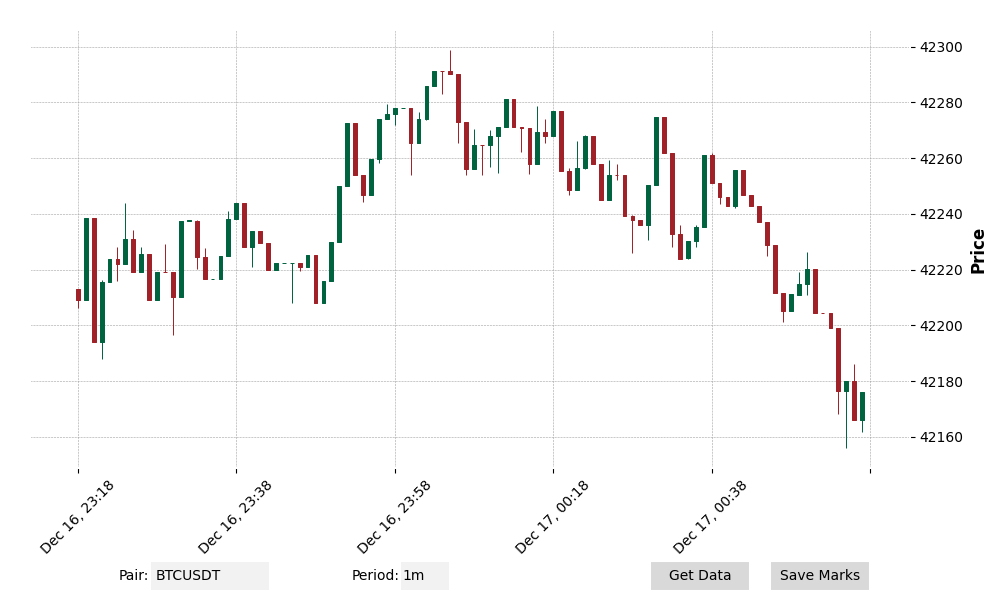

In [6]:
# plotter = CaptureOnClick(pair_df=pair_df, data_proc=dp)
plotter = CaptureOnClick(data_proc=dp)

## Utils. 
* Store selections

In [7]:
# Save points to file
# plotter.save_m_to_file()

print(f'Default pair: {plotter.pair} default period: {plotter.interval}')
   

Default pair: BTCUSDT default period: 1m


## debug print from chart, on mouse click 

In [8]:
print(plotter.captured_output)

Data coords: (41.926500000000004, 42276.90789041097)Figure clicked at: (823,18) | Saved marks data in: .\.data\ntb\v0.05a\mBTCUSDT-1m-2023-12-17.csv | 


In [ ]:
#del plotter

In [9]:
df = datamap
df = df.loc[:, df.notna().any()]
print(df)

                                               BTCUSDT  \
1m   {'StartDate': 2023-12-16 23:18:00, 'EndDate': ...   
3m   {'StartDate': None, 'EndDate': None, 'Updated'...   
5m   {'StartDate': None, 'EndDate': None, 'Updated'...   
15m  {'StartDate': None, 'EndDate': None, 'Updated'...   
30m  {'StartDate': None, 'EndDate': None, 'Updated'...   
1h   {'StartDate': 2023-12-12 21:00:00, 'EndDate': ...   
2h   {'StartDate': None, 'EndDate': None, 'Updated'...   
4h   {'StartDate': None, 'EndDate': None, 'Updated'...   
6h   {'StartDate': None, 'EndDate': None, 'Updated'...   
8h   {'StartDate': None, 'EndDate': None, 'Updated'...   
12h  {'StartDate': None, 'EndDate': None, 'Updated'...   
1d   {'StartDate': None, 'EndDate': None, 'Updated'...   
3d   {'StartDate': None, 'EndDate': None, 'Updated'...   
1w   {'StartDate': None, 'EndDate': None, 'Updated'...   
1M   {'StartDate': None, 'EndDate': None, 'Updated'...   

                                               ETHUSDT  
1m   {'StartDa